## Classification

This notebook uses a variety of supervised learning methods (logistic regression, support vector machine, naive bayes, and neural net, to name a few) on the American Prison Writing Archive corpus. The goal is to see if these methods can be used to predict the race, sex, or state of the essay's author. The results of this excercise could provide strong evidence for systematic differences within the corpus based on these author attributes

In [1]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories


Bad key "text.kerning_factor" on line 4 in
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import importlib
import helper_functions as fcns
import data_ingest as ing

In [3]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [4]:
data_directory = '../data/'
filename = 'APW_final.csv'
df = ing.load_prep_data(data_directory+filename)
df = ing.agg_groups(df, 'race','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])
df = ing.norm_text(df)
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender,race_agg,gender_agg,tokenized_text,normalized_text
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu..."


In [5]:
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition


# Race

In [6]:
true_cat='African American'
category='race_agg'
keep = ['African American', 'White (non-Hispanic)']

In [7]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)


/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/counting_words.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = [s == true_cat for s in df[category_col]]


In [8]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.9723127035830619
Testing Accuracy:
0.7352941176470589


naiveBayes
Training Accuracy:
0.8517915309446255
Testing Accuracy:
0.7091503267973857


bag
Training Accuracy:
0.8127035830618893
Testing Accuracy:
0.6862745098039216


SVM
Training Accuracy:
0.996742671009772
Testing Accuracy:
0.8235294117647058


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.8202614379084967




LogisticRegression
Precision:
0.9545454545454546
Recall:
0.44680851063829785
F1 Score:
0.6086956521739131
True Category is: African American


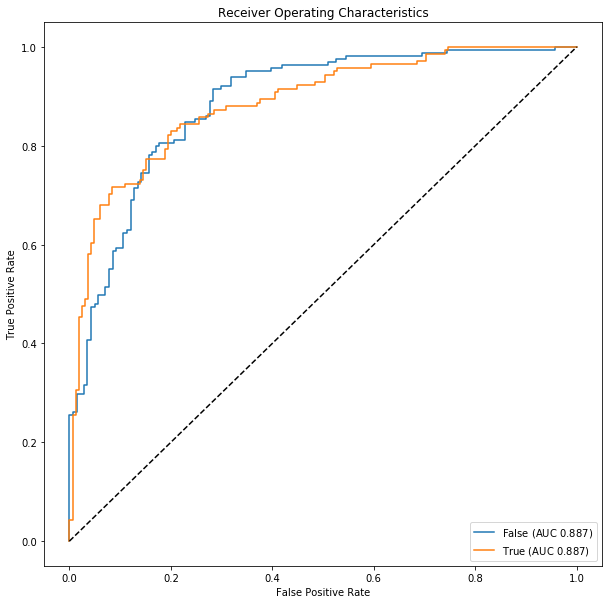

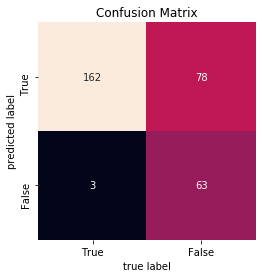

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.264706  0.714313   0.675000           0.672531  0.981818
True        0.264706  0.714313   0.954545           0.681401  0.446809
naiveBayes
Precision:
0.6354166666666666
Recall:
0.8652482269503546
F1 Score:
0.7327327327327328
True Category is: African American


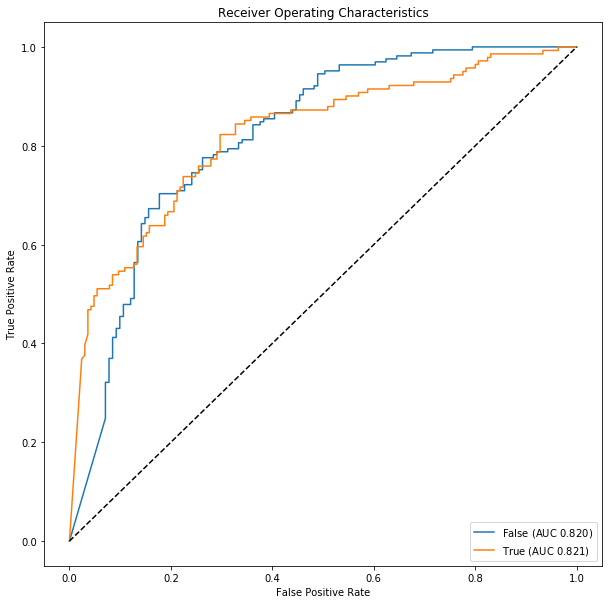

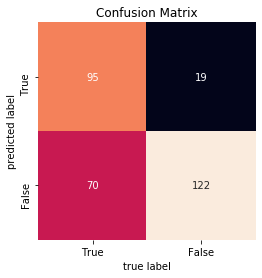

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False        0.29085  0.720503   0.833333           0.708556  0.575758
True         0.29085  0.720503   0.635417           0.611885  0.865248
bag
Precision:
0.8169014084507042
Recall:
0.41134751773049644
F1 Score:
0.5471698113207547
True Category is: African American


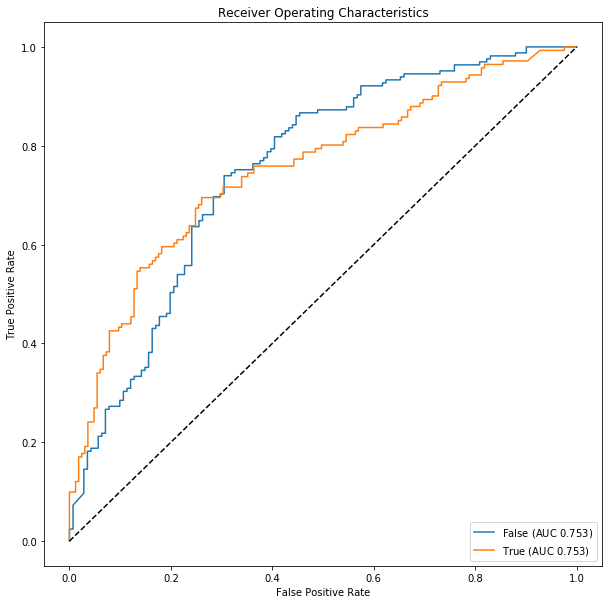

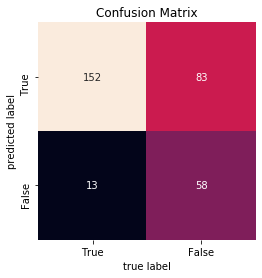

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
False       0.313725  0.66628   0.646809           0.638332  0.921212
True        0.313725  0.66628   0.816901           0.607272  0.411348
SVM
Precision:
0.8990825688073395
Recall:
0.6950354609929078
F1 Score:
0.784
True Category is: African American
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


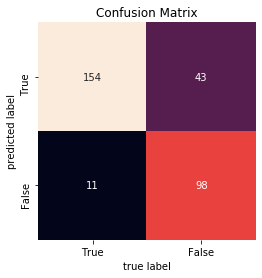

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.176471  0.814184   0.781726           0.765559  0.933333
True        0.176471  0.814184   0.899083           0.765417  0.695035
NeuralNet
Precision:
0.8771929824561403
Recall:
0.7092198581560284
F1 Score:
0.7843137254901961
True Category is: African American


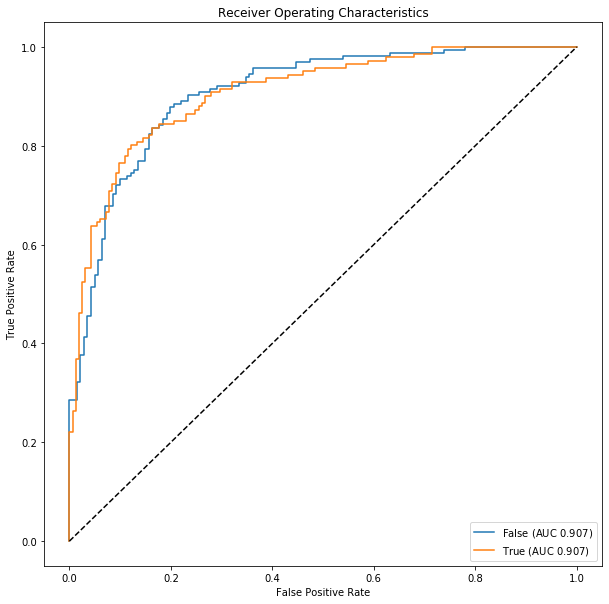

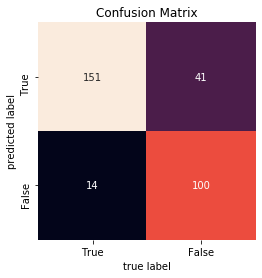

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.179739  0.812186   0.786458            0.76548  0.915152
True        0.179739  0.812186   0.877193            0.75611  0.709220


In [9]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)
fcns.evaluation('naiveBayes',clf_nb,test,true_cat)
fcns.evaluation('bag',clf_bag,test,true_cat)
fcns.evaluation('SVM',clf_svm,test,true_cat)
fcns.evaluation('NeuralNet',clf_nn,test,true_cat)



# Gender

In [10]:
true_cat='Female'
category='gender_agg'
keep = ['Female', 'Male']


In [11]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)


/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/counting_words.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = [s == true_cat for s in df[category_col]]


In [12]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.9536340852130326
Testing Accuracy:
0.9472361809045227


naiveBayes
Training Accuracy:
0.9129072681704261
Testing Accuracy:
0.9195979899497487


bag
Training Accuracy:
0.9699248120300752
Testing Accuracy:
0.949748743718593


SVM
Training Accuracy:
0.9843358395989975
Testing Accuracy:
0.949748743718593


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.9472361809045227




LogisticRegression
Precision:
0.0
Recall:
0.0
F1 Score:

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



0.0
True Category is: Female


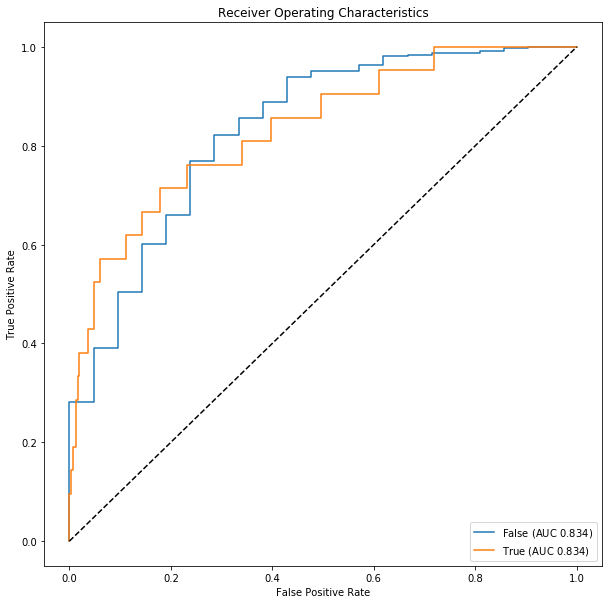

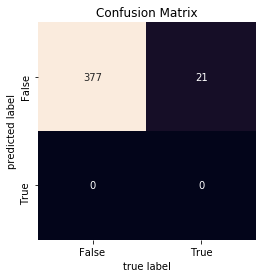

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False       0.052764  0.5   0.947236           0.947236     1.0
True        0.052764  0.5   0.000000           0.052764     0.0
naiveBayes
Precision:
0.07692307692307693
Recall:
0.047619047619047616
F1 Score:
0.058823529411764705
True Category is: Female


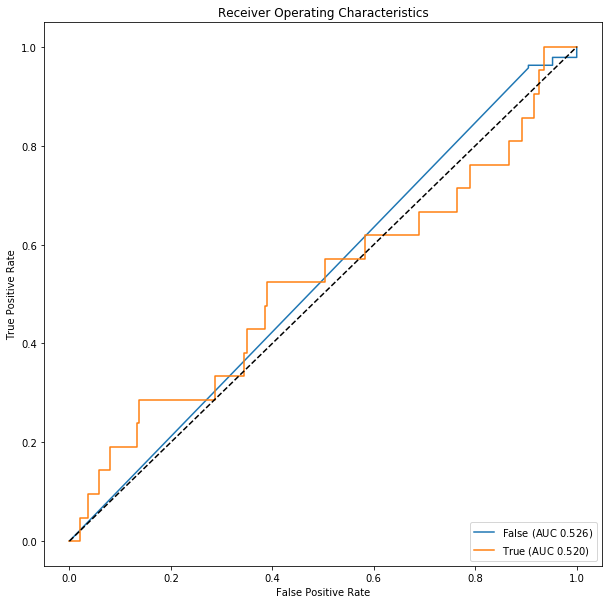

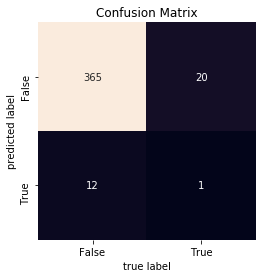

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.080402  0.507894   0.948052           0.948026  0.968170
True        0.080402  0.507894   0.076923           0.053914  0.047619
bag
Precision:
1.0
Recall:
0.047619047619047616
F1 Score:
0.0909090909090909
True Category is: Female


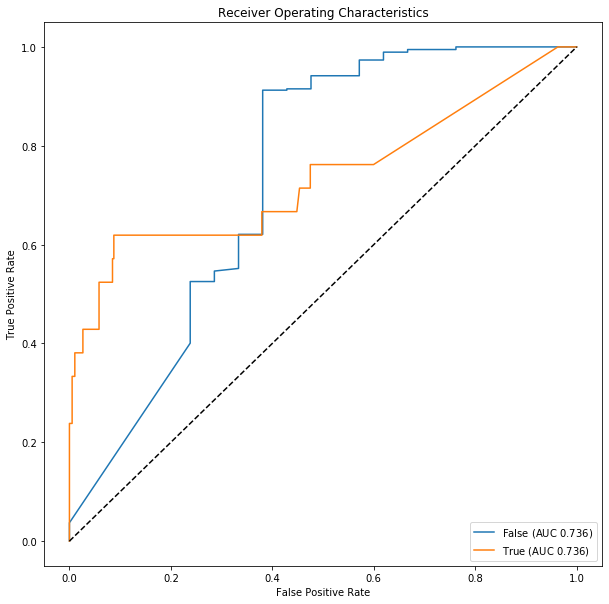

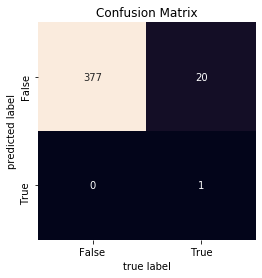

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
False       0.050251  0.52381   0.949622           0.949622  1.000000
True        0.050251  0.52381   1.000000           0.097870  0.047619
SVM
Precision:
1.0
Recall:
0.047619047619047616
F1 Score:
0.0909090909090909
True Category is: Female
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


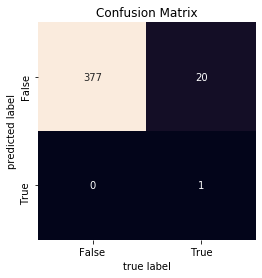

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
False       0.050251  0.52381   0.949622           0.949622  1.000000
True        0.050251  0.52381   1.000000           0.097870  0.047619
NeuralNet
Precision:
0.0
Recall:
0.0
F1 Score:
0.0
True Category is: Female


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


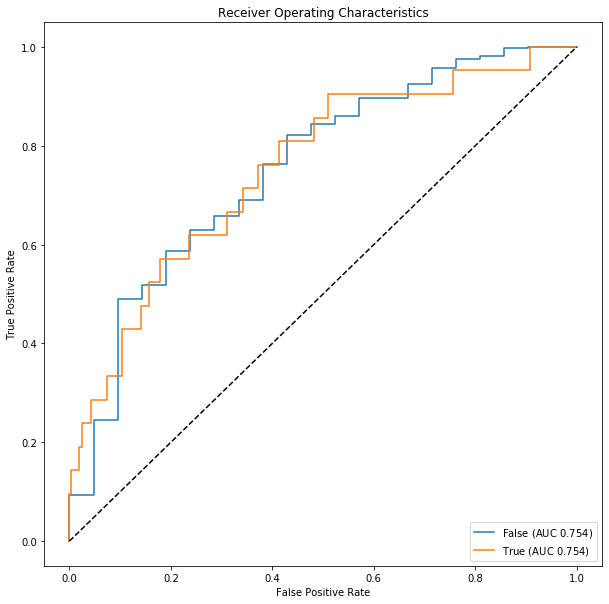

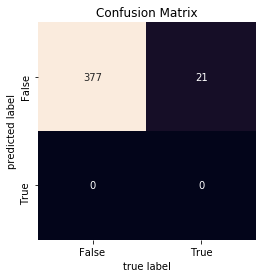

          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False       0.052764  0.5   0.947236           0.947236     1.0
True        0.052764  0.5   0.000000           0.052764     0.0


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)
fcns.evaluation('naiveBayes',clf_nb,test,true_cat)
fcns.evaluation('bag',clf_bag,test,true_cat)
fcns.evaluation('SVM',clf_svm,test,true_cat)
fcns.evaluation('NeuralNet',clf_nn,test,true_cat)



# State

In [14]:
true_cat='California'
category='state'
keep = list(df['state'].unique())

In [15]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)



In [16]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.847528290649196
Testing Accuracy:
0.8042959427207638


naiveBayes
Training Accuracy:
0.8653960690887433
Testing Accuracy:
0.7852028639618138


bag
Training Accuracy:
0.927933293627159
Testing Accuracy:
0.8615751789976134


SVM
Training Accuracy:
0.9922572960095295
Testing Accuracy:
0.8591885441527446


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.8568019093078759




LogisticRegression
Precision:
1.0
Recall:
0.05747126436781609
F1 Score:
0.10869565217391304
True Category is: California


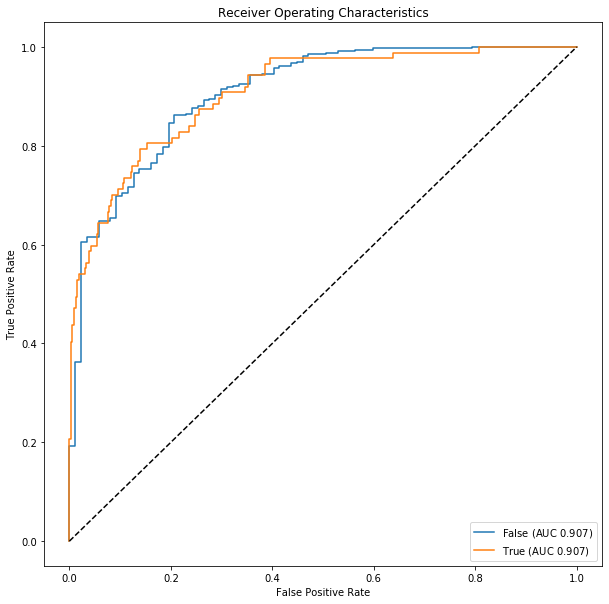

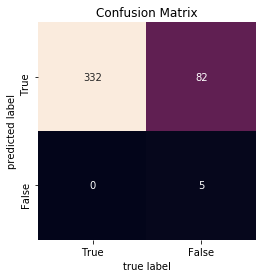

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.195704  0.528736   0.801932           0.801932  1.000000
True        0.195704  0.528736   1.000000           0.253175  0.057471
naiveBayes
Precision:
0.4727272727272727
Recall:
0.2988505747126437
F1 Score:
0.36619718309859156
True Category is: California


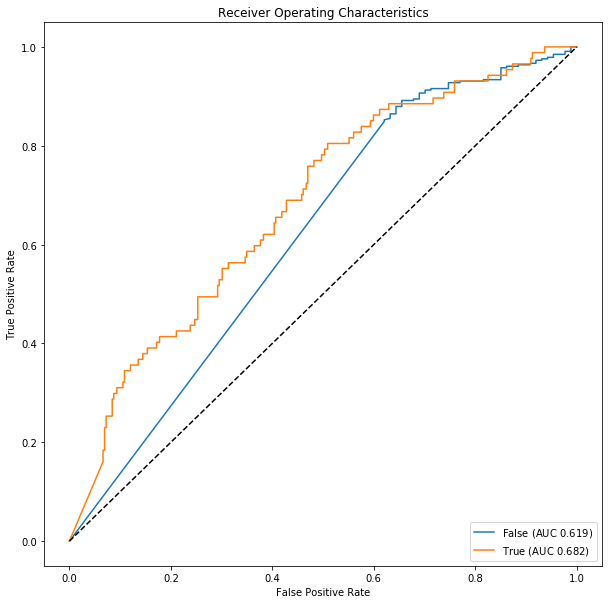

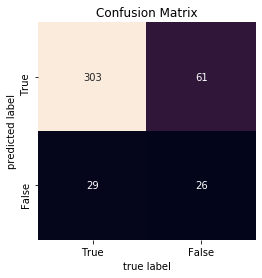

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.214797  0.605751   0.832418           0.828919  0.912651
True        0.214797  0.605751   0.472727           0.286860  0.298851
bag
Precision:
0.8536585365853658
Recall:
0.40229885057471265
F1 Score:
0.546875
True Category is: California


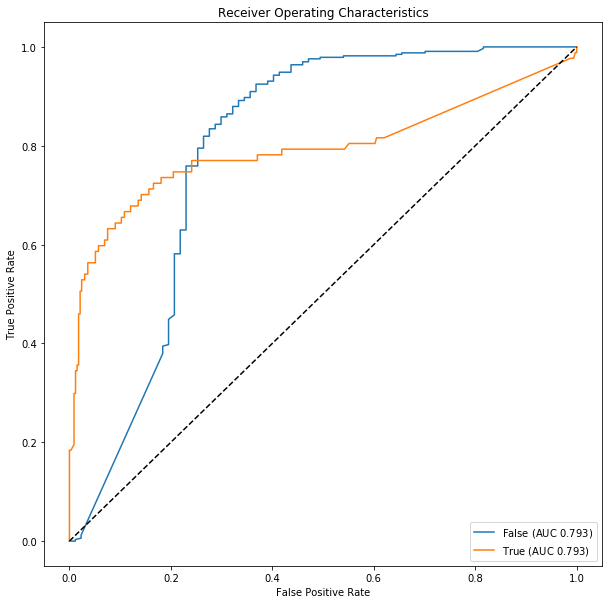

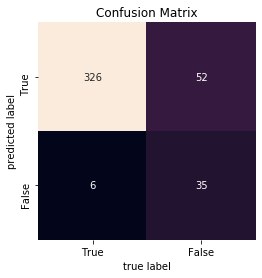

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.138425  0.692113   0.862434           0.861168  0.981928
True        0.138425  0.692113   0.853659           0.467531  0.402299
SVM
Precision:
0.9666666666666667
Recall:
0.3333333333333333
F1 Score:
0.49572649572649563
True Category is: California
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


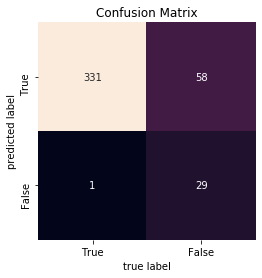

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.140811  0.665161   0.850900           0.850723  0.996988
True        0.140811  0.665161   0.966667           0.460647  0.333333
NeuralNet
Precision:
0.9655172413793104
Recall:
0.3218390804597701
F1 Score:
0.48275862068965514
True Category is: California


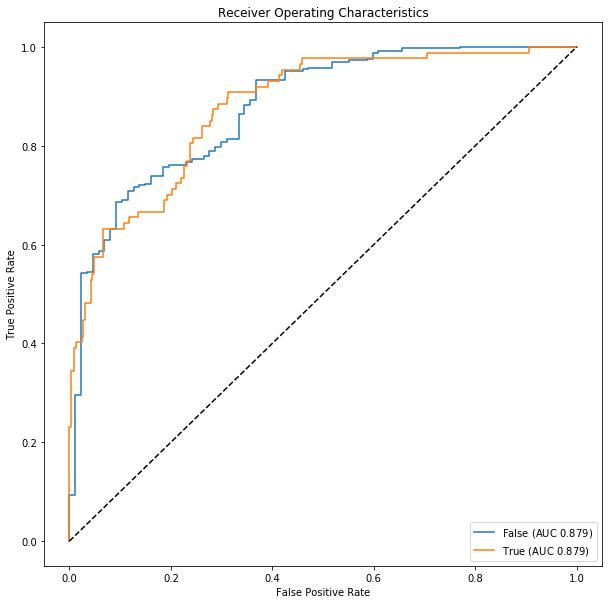

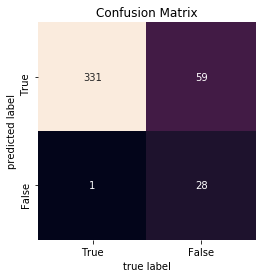

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.143198  0.659414   0.848718           0.848548  0.996988
True        0.143198  0.659414   0.965517           0.451553  0.321839


In [17]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)
fcns.evaluation('naiveBayes',clf_nb,test,true_cat)
fcns.evaluation('bag',clf_bag,test,true_cat)
fcns.evaluation('SVM',clf_svm,test,true_cat)
fcns.evaluation('NeuralNet',clf_nn,test,true_cat)
